In [52]:
import pickle
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from random import shuffle, randint

In [53]:
# 3.1

with open("data.pickle", "rb") as f:
    dataset = pickle.load(f)

x_test, y_test = dataset["test"][:, 0], dataset["test"][:, 1]

x_trains = [[] for _ in range(15)]
y_trains = [[] for _ in range(15)]

for x, y in dataset["train"]:
    i = 0
    while len(x_trains[i]) >= 500:
        i = randint(0, 14)
    x_trains[i].append(x)
    y_trains[i].append(y)

x_trains = np.array([np.array(x) for x in x_trains])
y_trains = np.array([np.array(y) for y in y_trains])

In [54]:
# 3.2

averages = {}
for degree in range(1, 11):
    polynomial = PolynomialFeatures(degree)
    res = []

    for x_train, y_train in zip(x_trains, y_trains):
        model = LinearRegression()
        model.fit(polynomial.fit_transform(x_train.reshape(-1, 1)), y_train)
        res.append(model.predict(polynomial.fit_transform(x_test.reshape(-1, 1))))

    variance = np.var(res, axis=0)
    square = np.vectorize(lambda x: x**2)
    bias = y_test - np.mean(res, axis=0)
    bias_square = square(bias)
    mse = np.mean(square([y_test - y_pred for y_pred in res]), axis=0)

    averages[degree] = {
        "bias": np.mean(bias),
        "bias_square": np.mean(bias_square),
        "variance": np.mean(variance),
        "mse": np.mean(mse),
    }

    print(degree, averages[degree])

1 {'bias': 0.23503021609958985, 'bias_square': 1.0063665090760427, 'variance': 0.053815666259082476, 'mse': 1.0601821753351266}
2 {'bias': 0.22736574665992704, 'bias_square': 0.9471690259245611, 'variance': 0.07737009180420998, 'mse': 1.024539117728772}
3 {'bias': -0.01148269700485347, 'bias_square': 0.014495991059771073, 'variance': 0.0880498525746934, 'mse': 0.10254584363446435}
4 {'bias': -0.00048344424844501963, 'bias_square': 0.013731745056436238, 'variance': 0.13635049756046022, 'mse': 0.15008224261689657}
5 {'bias': 0.0036234918771844036, 'bias_square': 0.013599701267091724, 'variance': 0.16456656748149334, 'mse': 0.17816626874858513}
6 {'bias': -0.00147999503000944, 'bias_square': 0.013582137168462793, 'variance': 0.2020570598712303, 'mse': 0.2156391970396931}
7 {'bias': 0.002096261936723942, 'bias_square': 0.013695479635964907, 'variance': 0.24602116658471035, 'mse': 0.2597166462206752}
8 {'bias': 0.013452349977432988, 'bias_square': 0.02656081116515111, 'variance': 0.21772810

In [55]:
# 4

for degree, average in averages.items():
    irreducible_error = average["mse"] - average["variance"] - average["bias_square"]
    print(degree, round(irreducible_error, 5))

1 0.0
2 0.0
3 -0.0
4 0.0
5 0.0
6 0.0
7 -0.0
8 -0.0
9 0.0
10 -0.0


<Axes: >

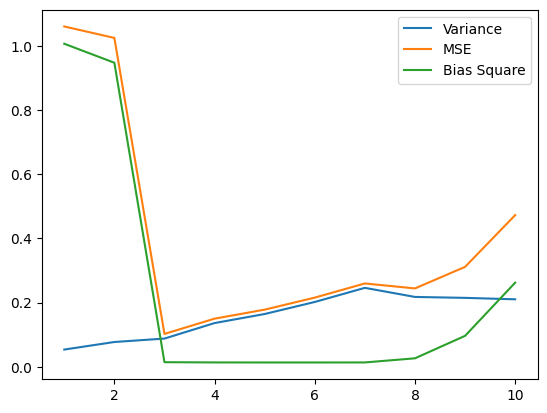

In [60]:
sns.lineplot(
    x=range(1, 11), y=map(lambda x: x["variance"], averages.values()), label="Variance"
)
sns.lineplot(x=range(1, 11), y=map(lambda x: x["mse"], averages.values()), label="MSE")
sns.lineplot(
    x=range(1, 11),
    y=map(lambda x: x["bias_square"], averages.values()),
    label="Bias Square",
)